# *House Price* Prediction EDA

-문제 정의 : 집의 정보를 가지고 **가격**을 예측하는 **회귀문제**  
-평가 지표 : **RMSE**(평균 제곱근 편차, 예측값과 관측값 사이의 차=잔차) 

## <목차>
>### **1. 데이터 탐색**
>- 변수 시각화
>- 이상치 및 결측치 확인 + 처리

>### **2. 데이터 전처리**
>- 정규화
>- 변수 수정

>### **3. 모델링**
>- 회귀
>- GBM ( LGB / XGB )
>- 앙상블

## *1. 데이터 탐색*
1. 시각화
2. 이상치 및 결측치 확인 + 수정

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                #Analysis
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats  # 통계툴 (seaborn과 함께 import 해주기)
#scipy는 과학기술 계산용 함수 및 알고리즘 제공

#Visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import gc

In [2]:
df= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [3]:
# 데이터의 크기 파악하기! shape 이용
#(총 데이터의 개수, 피쳐(변수)의 개수)

print(df.shape, df_test.shape) #test는 피쳐 수가 1 적다! 

(15035, 21) (6468, 20)


In [4]:
# 결측치 파악
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

ID : 집을 구분하는 번호  
date : 집을 구매한 날짜  
price : 집의 가격(Target variable)  
bedrooms : 침실의 수  
bathrooms : 화장실의 수  
sqft_living : 주거 공간의 평방 피트(면적)  
sqft_lot : 부지의 평방 피트(면적)  
floors : 집의 층 수  
waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)  
view : Has been viewed  
condition : 집의 전반적인 상태  
grade : King County grading 시스템 기준으로 매긴 집의 등급  
sqft_above : 지하실을 제외한 평방 피트(면적)  
sqft_basement : 지하실의 평방 피트(면적)  
yr_built : 지어진 년도  
yr_renovated : 집을 재건축한 년도  
zipcode : 우편번호  
lat : 위도  
long : 경도  
sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)  
sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있  

### Price(목적변수) 분포와 정규성 파악하기

In [5]:
df['price'].describe().astype('int32')

# mean과 max의 차이가 크고, 표준편차(std)가 완전 크다!(많이 퍼져있다)

count      15035
mean      540682
std       371524
min        78000
25%       322000
50%       450000
75%       645000
max      7700000
Name: price, dtype: int32

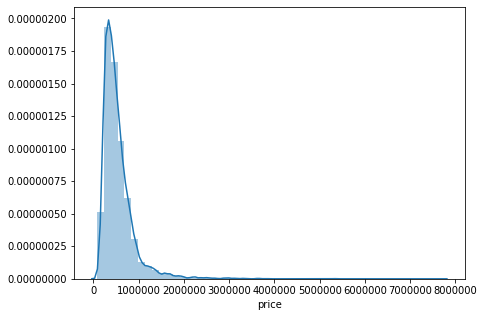

In [6]:
# 가격 histogram 그리기(왼쪽으로 치우친 분포임! Skewed 됨.) 

f, ax = plt.subplots(figsize=(7,5)) 
#f는 figure로서 전체 subplot을 말함. ax는 낱개를 말함!

sns.distplot(df['price'])

In [7]:
# Price분포의 왜도 첨도 계산하기
# %f : 실수를 출력(복소수 출력 X) / %.3f : 소수 셋째자리까지 출력

print('Skewness(왜도) : %f' % df['price'].skew() ) # %f : fomat같은 것. 
# 왜도(skew) : 오른쪽 꼬리가 길수록 값이 크다
print('Kurtosis(첨도) : %f' % df['price'].kurt() )
# 첨도(kurt) : 3에 가까울수록 정규분포에 가까움. K<3이면 평평, K>3이면 뾰족!

Skewness(왜도) : 4.290252
Kurtosis(첨도) : 40.154919


왜도, 첨도 모두 개판!! 정규분포 아님!! ㅠㅠ  
하지만 회귀 모델을 써야하므로 정규화(normalize)를 해줄거심!!

### Q-Q plot을 이용해 price의 정규성 파악하기 (probplot 이용)
Q-Q plot : 확률분포가 정규분포인지 확인.  정규분포를 따르면 선형에 적합하게 나타난다

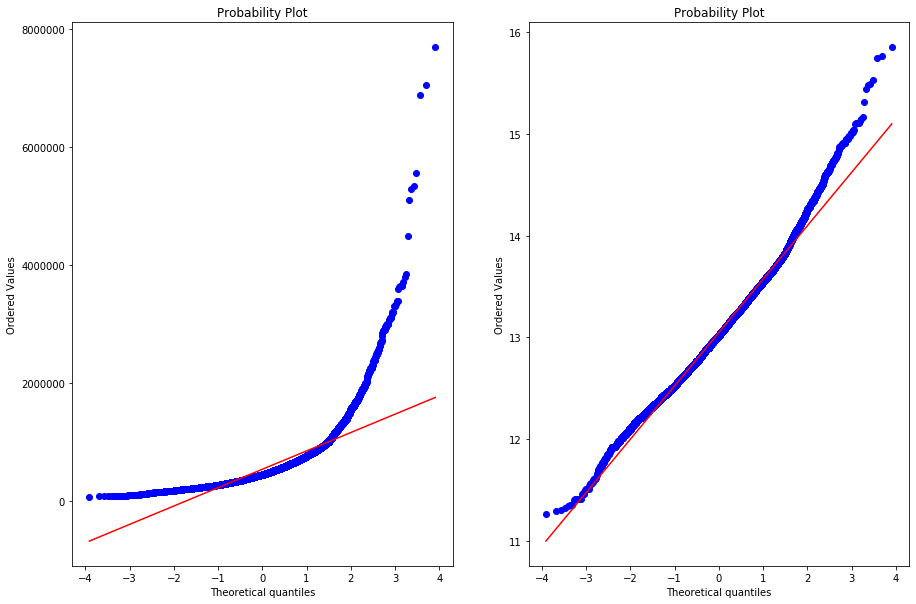

In [8]:
fig = plt.figure(figsize = (15, 10))

#플롯 두개를 그려서 비교! 
fig.add_subplot(1,2,1)
res = stats.probplot( df['price'], plot=plt )

fig.add_subplot(1,2,2) 
# numpy를 이용해 log를 취해줌 > 이전보다 더 정규성을 가짐!
res = stats.probplot( np.log1p(df['price']), plot=plt)

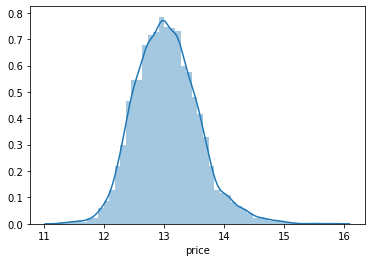

In [9]:
#로그 취해주고, 다시 히스토그램 그리기! 정규성 확인된당~!~!

df['price'] = np.log1p(df['price'])

f, ax = plt.subplots(figsize=(6,4))
sns.distplot(df['price'])


----

## 반응 변수 시각화하기
*1. 피어슨 상관관계* : 연속형 변수에 사용  
*2. 스피어만 순위 상관관계* : 범주형 변수도 포함되었을 경우에 사용  
> 이 문제는 범주형 변수도 포함되므로, **스피어만 순위 상관관계** 활용!

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']
[[ 1.00000000e+00  6.62125256e-01  6.46482431e-01  5.73777345e-01
   5.47867765e-01  4.98988916e-01  4.50691696e-01  3.50184916e-01
   3.28674116e-01  2.91719516e-01]
 [ 6.62125256e-01  1.00000000e+00  7.17799601e-01  6.65039030e-01
   7.15099945e-01  6.61112311e-01  1.00037933e-01  3.86833231e-01
   5.04506199e-01  2.11468857e-01]
 [ 6.46482431e-01  7.17799601e-01  1.00000000e+00  7.48213636e-01
   8.46081041e-01  7.48612310e-01  2.55443864e-02  6.49001466e-01
   4.08416554e-01  2.27205439e-01]
 [ 5.73777345e-01  6.65039030e-01  7.48213636e-01  1.00000000e+00
   6.99157749e-01  5.75235493e-01  2.51542683e-02  4.45932971e-01
   3.11335434e-01  2.52132180e-01]
 [ 5.47867765e-01  7.15099945e-01  8.46081041e-01  6.99157749e-01
   1.00000000e+00  6.95671508e-01 -2.82371151e-02  5.40892582e-01
   6.03085217e-01  1.40010628e-01]
 [ 4.98988916e-01  6.61112311e-01  7.48612310e-01  5.75235

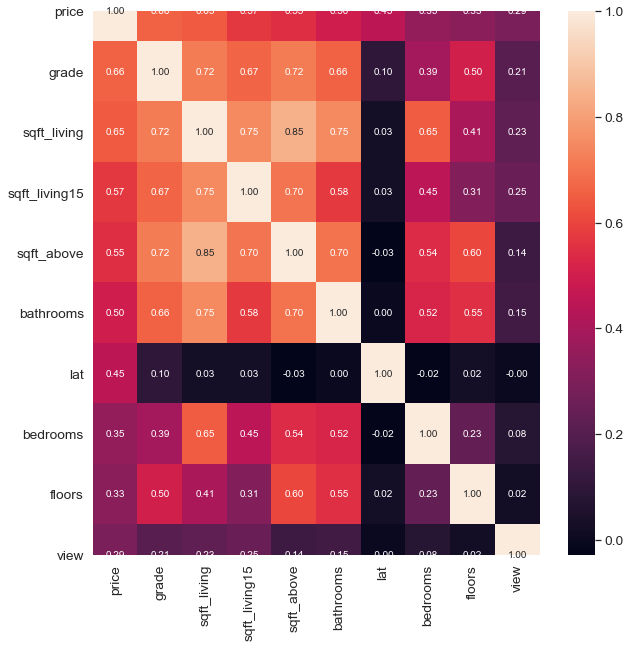

In [10]:
# 가격과 가장 상관관계가 높은 순서대로 스피어만 순위 상관관계 나타냄(히트맵)

import scipy as sp

#abs는 절댓값 함수! 이는 반비례 관계(마이너스)도 고려하기 위함. 
cor_abs = abs(df.corr(method='spearman'))

# price와 상관관계가 높은 column 10개 뽑기
# nlargest : 컬렉션 내부에서 가장 큰 n개의 아이템 찾으려 할 때
# .index : index 값 추출
cor_cols = cor_abs.nlargest(n=10, columns='price').index
print(cor_cols.values)

#spearman coefficient matrix
#.values : 딕셔너리 value 값을 보여줌
cor = np.array(sp.stats.spearmanr(df[cor_cols].values))[0] #상관계수 추출
print(cor)

#상관계수 히트맵 그리기
plt.figure( figsize = (10,10))
sns.set( font_scale=1.25)
#annot = True : 숫자 표시, annot_kws : 숫자 크기
sns.heatmap(cor, fmt='.2f', annot=True, annot_kws={'size':10}, 
           xticklabels=cor_cols.values, yticklabels=cor_cols.values)

> 상관관계 분석 결과 가격과 집의 등급(grade), 주거공간의 크기(sqft), 위도 등이
밀접한 관계를 가지는 것을 알 수 있음!

### grade와 price의 관계 시각화하기

       price  grade
0  12.309987      7
1  12.100718      6
2  13.142168      8
3  12.458779      7
4  12.583999      7


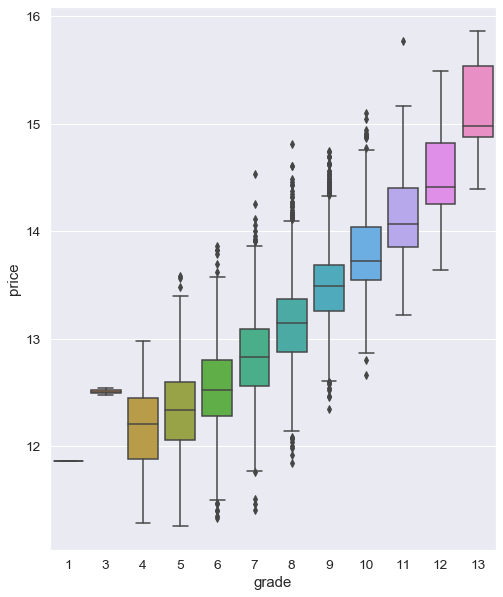

In [11]:
#concat 함수 : 데이터프레임을 결합해줌! (디폴트 : axis=0)
data = pd.concat( [ df['price'], df['grade']], axis=1)
print(data.head())

f, ax = plt.subplots(figsize=(8,10))
fig = sns.boxplot(data=data, x='grade', y='price')

- 등급 3의 경우 값이 크다
- 등급 7,8,9에서는 이상치(outlier)가 많다
- 등급 8과 11에서는 차이가 큰 이상치가 나타난다
> 왜지??? 그럼 이상치를 그냥 제거해버리자!

### 이상치 제거하기

In [12]:
df.loc[ (df['price']>12) & (df['grade']==3) ] #grade = 3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,20150225T000000,12.476104,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,20141104T000000,12.542548,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


In [13]:
df.loc[ (df['price']>14.7) & (df['grade']==8)] #grade=8

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7173,7173,20140813T000000,14.808763,5,4.0,4230,27295,2.0,1,4,...,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295


In [14]:
df.loc[ (df['price']>15.5) & (df['grade']==11)] #grade=11

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,15.77031,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449


In [15]:
# id가 2302, 4123, 7173, 2775 제거하기

df = df.loc [ df['id']!=2302]
df = df.loc [ df['id']!=4123]
df = df.loc [ df['id']!=7173]
df = df.loc [ df['id']!=2775]

# 이것두 됨
# df = df.drop( [df.index[2302], df.index[4123], df.index[7173], df.index[2775]])

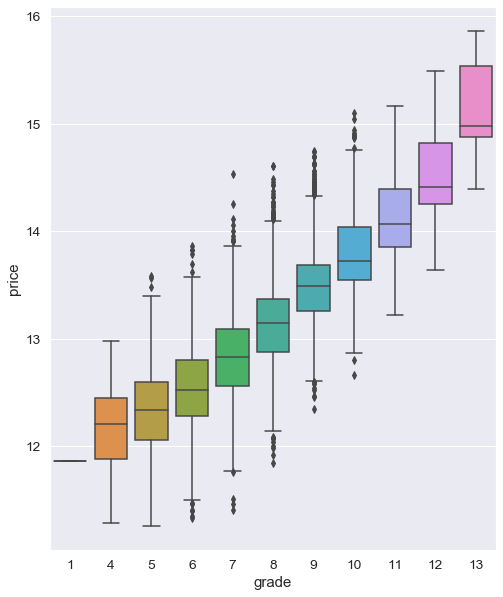

In [16]:
data = pd.concat( [ df['price'], df['grade']], axis=1)
f, ax = plt.subplots(figsize=(8,10))
fig = sns.boxplot(data=data, x='grade', y='price')

#이상치 삭제되었다!!!

### sqft_living(주거 평방피트)와 price의 관계 시각화하기

- sqft_living : 주거 공간의 평방피트(실제 사용면적)  
- sqft_lot : 부지의 평방피트(총 부지의 면적)

- sqft_living15 : 2015년 기준 주거 공간의 평방피트(집을 재건축 했다면 변화가 있을 수 있음)

- sqft_above : 지하실을 제외한 평방피트
- sqft_basement : 지하실의 평방피트

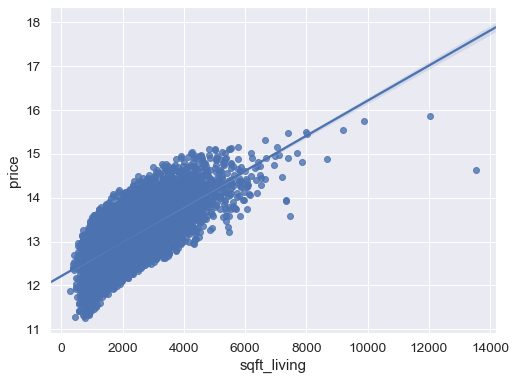

In [17]:
data = pd.concat( [df['sqft_living'], df['price']], axis=1)
f, ax = plt.subplots(figsize=(8,6))

#regplot : 산점도 나타내기(선형회귀 선까지!)
fig = sns.regplot(data=data, x='sqft_living', y='price')

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,12.309987,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,12.100718,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,13.142168,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,12.458779,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,12.583999,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [19]:
# 이상치 제거

df.loc [df['sqft_living'] > 13000] 
# 다른것들에 비해 sqrt_living 만 비정상적으로 크다 > 제거
df = df.loc [ df['id']!=8912]

### sqft_living15(2015년 기준 주거 평방피트)와 price의 관계 시각화하기

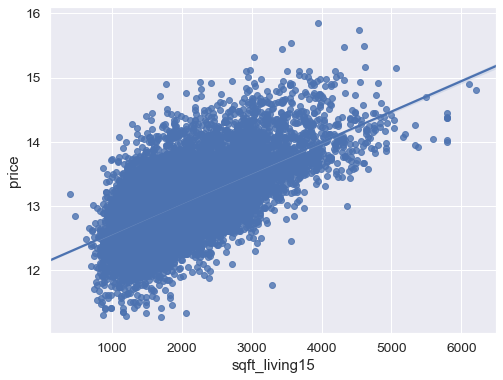

In [20]:
data = pd.concat( [df['price'], df['sqft_living15']], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig = sns.regplot(data=data, x='sqft_living15', y='price')

>재건축을 하다보니 가격 분산이 2015년 이전보다 크다!   
적절한 Feature Engineering이 필요해보임


### sqft_above(지하실 제외 면적)과 price의 관계 시각화하기

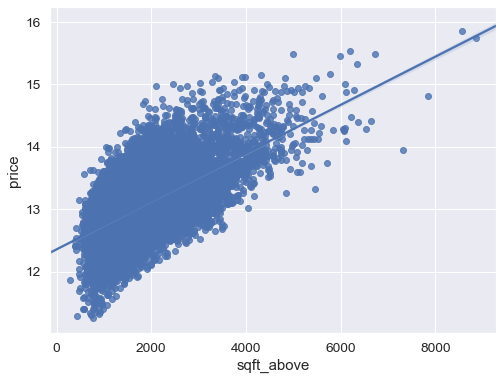

In [21]:
data = pd.concat( [ df['sqft_above'], df['price']], axis=1 )
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(data=data, x='sqft_above', y='price')

### bathroom(화장실의 수)와 price의 관계 시각화하기

- 0.5 : 세면대, 화장실
- 0.75 : 세면대, 화장실, 샤워실
- 1 : 세면대, 화장실, 샤워실, 욕조

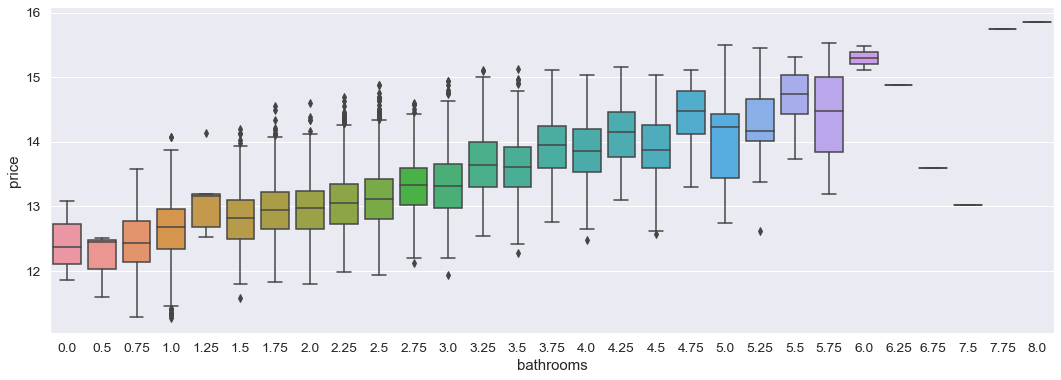

In [22]:
data = pd.concat( [ df['bathrooms'], df['price']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(data=data, x='bathrooms', y='price')

### bedrooms(침실의 수)와 price의 관계 시각화하기

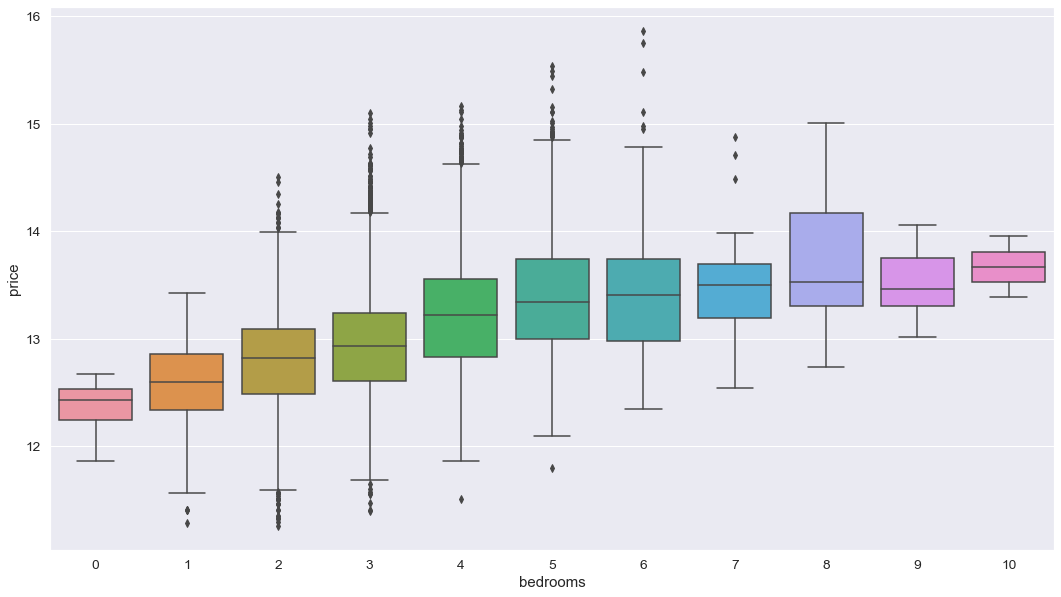

In [23]:
data = pd.concat( [ df['bedrooms'], df['price']], axis=1)
f, ax = plt.subplots(figsize=(18, 10))
fig = sns.boxplot(data=data, x='bedrooms', y='price')

----------

## *2. 데이터 전처리*
1. 이상치 제거하기 (위에서 실행)
2. 정규화
3. 변수수정

### 정규화 (Skew 된 sqft columns를 정규화하기)

In [24]:
#skew 된 columns를 numpy를 통한 log를 이용해 정규화! 

skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    df[c] = np.log1p(df[c].values)
    df_test[c] = np.log1p(df_test[c].values)

### 변수수정 (날짜, 재건축 년도 수정하기)
재건축 년도는 재건축 안됐으면 0으로 표시되어있음. 이를 그냥 건축년도로 수정!

In [25]:
df_test['date'].head()

0    20141209T000000
1    20141209T000000
2    20140512T000000
3    20150415T000000
4    20150312T000000
Name: date, dtype: object

In [26]:
for df in [df, df_test]:
    df['date'] = df['date'].apply(lambda x:x[0:8])
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan
                                                  if x==0 else x )
    #재건축 년도가 0이면 결측값으로 바꾼다. 
    
    df['yr_renovated'] = df['yr_renovated'].fillna( df['yr_built'])
    
    #결측값을 년도로 바꾼다!

---------

## *3. 변수 생성*

In [27]:
df.head(3)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209,3,2.25,7.852050,8.887791,2.0,0,0,3,7,7.682943,5.993961,1951,1991.0,98125,47.7210,-122.319,1690,7639
1,15036,20141209,4,3.00,7.581210,8.517393,1.0,0,0,5,7,6.957497,6.814543,1965,1965.0,98136,47.5208,-122.393,1360,5000
2,15037,20140512,4,4.50,8.598036,11.532051,1.0,0,0,3,11,8.266421,7.333676,2001,2001.0,98053,47.6561,-122.005,4760,101930


In [28]:
#방 전체 개수
for df in [df, df_test]:
    
    df['total_rooms'] = df['bedrooms'] + df['bathrooms'] 

    #거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot'] 
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']

    # 면적 대비 거실의 비율 
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15'] 

    #재건축 여부 (0, 1구분, lambda 함수 이용)
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x:0 if x==0 else 1) #0으로 바꿈
    
    #날짜 정수로 바꾸기
    df['date'] = df['date'].astype('int')
    
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated
0,15035,20141209,3,2.25,7.852050,8.887791,2.0,0,0,3,...,47.7210,-122.319,1690,7639,5.25,0.883465,13.676905,0.574110,0.221233,1
1,15036,20141209,4,3.00,7.581210,8.517393,1.0,0,0,5,...,47.5208,-122.393,1360,5000,7.00,0.890086,13.772040,0.550478,0.272000,0
2,15037,20140512,4,4.50,8.598036,11.532051,1.0,0,0,3,...,47.6561,-122.005,4760,101930,8.50,0.745577,15.600098,0.551153,0.046699,0
3,15038,20150415,3,1.00,7.484930,8.918784,1.0,0,0,3,...,47.5123,-122.337,1780,8113,4.00,0.839232,13.551911,0.552315,0.219401,0
4,15039,20150312,3,2.50,7.544861,8.788898,2.0,0,0,3,...,47.3684,-122.031,2390,7570,5.50,0.858454,7.544861,1.000000,0.315720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,21498,20140626,3,1.75,7.313887,9.390075,1.0,0,0,3,...,47.3095,-122.002,1320,11303,4.75,0.778895,7.313887,1.000000,0.116783,0
6464,21499,20150126,3,2.00,7.307202,7.027315,3.0,0,0,3,...,47.5699,-122.288,1400,1230,5.00,1.039829,7.307202,1.000000,1.138211,0
6465,21500,20150219,3,2.50,7.178545,7.166266,2.0,0,0,3,...,47.5773,-122.409,1330,1265,5.50,1.001714,11.949314,0.600750,1.051383,0
6466,21501,20140623,2,0.75,6.928538,7.208600,2.0,0,0,3,...,47.5944,-122.299,1020,2007,2.75,0.961149,6.928538,1.000000,0.508221,0


## *4. 모델링*
1. 단순 선형회귀
2. LightGBM

### 단순 선형회귀


In [29]:
df= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [30]:
df['price']

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#statesmodel : 검정, 추정, 회귀, 시계열 분석 등을 가능하게 해주는 패키지

train_columns = [c for c in df.columns 
                 if c not in ['id', 'price', 'date']]

model = sm.OLS(df['price'].values, df[train_columns])
#OLS(Ordinary Least Squares) : 가장 기본적인 선형회귀법. 
# 잔차제곱합(RSS)을 최소화 하는 가중치 벡터를 행렬 미분으로 구하는 방법 

result = model.fit()
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              8267.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:00:57   Log-Likelihood:                     -2.0514e+05
No. Observations:               15035   AIC:                                  4.103e+05
Df Residuals:                   15018   BIC:                                  4.104e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

모델 설명력은 1로 굉장히 높지만, 각각의 변수들 중에서는 p-value가 높은 값들이 있음을 확인할 수 있음. 이는 FE해서 나온 파생 변수들이 기존의 변수와 연관되어 있고, sqft_로 시작하는 변수들끼리의 상관성때문에 **다중공선성**의 문제를 갖기 때문. 

#### 다중 공선성 
: 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제  


In [32]:
# 다중공선성 체크하기 (vif 이용한 확인)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["Features"] = df.columns
vif["VIF values"] = [variance_inflation_factor(df.values, i)
                    for i in range(df.shape[1])]

vif.sort_values(by = 'VIF values', ascending=False)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

보통의 경우 10 이상이면 다중공선성이 존재한다고 말하는데, 위의 식에서는 waterfront, view, sqft_lot15, is_renovated 4가지 변수를 제외한 모든 변수들에서 **다중공선성**이 존재하는 문제점이 있음!  

> 이를 해결하기 위한 방안은
- 다중공선성에 robust한 트리모델을 사용하는 방법
- 변수제거 및 Feature Engineering, 변환등을 통한 대체   (선형회귀일 때 활용)
- 관측값을 늘려 표본의 크기를 증가 (거의 실현 불가)

### LightGBM

In [ ]:
!pip install lightgbm

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import RidgeCV

param = {'num_leaves':31,
         'min_data_in_leaf':30,
        'objective': 'regression',
        'max_depth':-1,
         'learning_rate': 0.015,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950}
 
    
y_reg = df['price']

#prepare fit model with cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(df))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()



In [ ]:
#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df)):
    trn_data = lgb.Dataset(df.iloc[trn_idx][train_columns], label=y_reg.iloc[trn_idx])#, categorical_feature=categorical_feats)
    val_data = lgb.Dataset(df.iloc[val_idx][train_columns], label=y_reg.iloc[val_idx])#, categorical_feature=categorical_feats)

num_round = 10000
clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 100)
oof[val_idx] = clf.predict(df.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
#feature importance
fold_importance_df = pd.DataFrame()
fold_importance_df["Feature"] = train_columns
fold_importance_df["importance"] = clf.feature_importance()
fold_importance_df["fold"] = fold_ + 1
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df]
                                      , axis=0)
#predictions
predictions += clf.predict(df_test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
cv = np.sqrt(mean_squared_error(oof, y_reg))
print(cv)